## Document Denoising Using Autoencoder 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import gc
%matplotlib inline

### 1. Loading Image from folder

In [4]:
def load_images(directory):
    
    import glob
    from keras.preprocessing.image import img_to_array,load_img
    import numpy as np

    
    path = glob.glob(directory)
    
    array_shape = (len(path), 258, 540, 1)
    image_shape = (258, 540,1)
    
    image_list = np.zeros(array_shape)
    for i, fig in enumerate(path):
        img = load_img(fig, target_size=image_shape,color_mode='grayscale')
        x = img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [5]:
X_train_img = load_images('data/train/*.png')
y_train_img = load_images('data/train_cleaned/*.png')
X_test_img = load_images('data/test/*.png')

In [75]:
print(X_train_img.shape)
print(y_train_img.shape)
print(X_test_img.shape)

(144, 258, 540, 1)
(144, 258, 540, 1)
(72, 258, 540, 1)


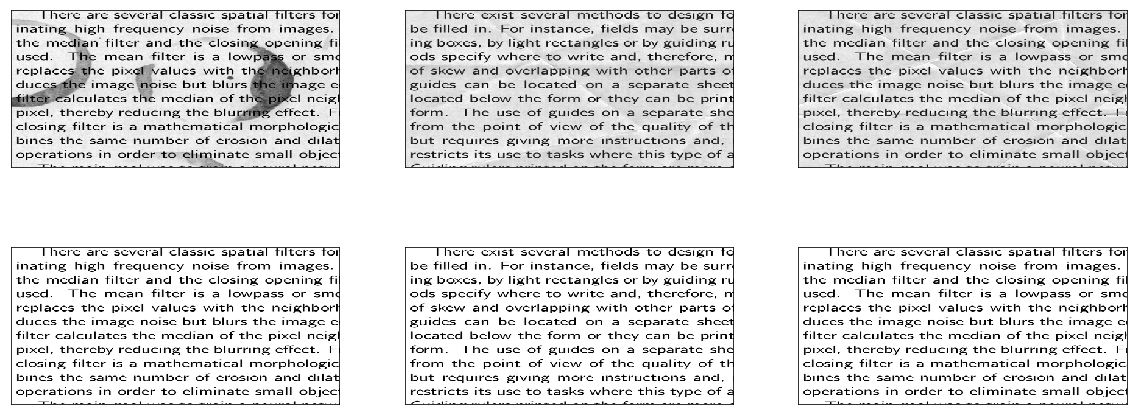

In [76]:

fig = plt.figure(figsize=(20,8))

for i in range(3):
    ax = fig.add_subplot(2, 3, i+1, xticks=[], yticks=[])
    ax.imshow(X_train_img[8+i].reshape(258,540),cmap='gray')

    ax = fig.add_subplot(2, 3, i+4 , xticks=[], yticks=[])
    ax.imshow(y_train_img[8+i].reshape(258,540),cmap='gray')
    

    


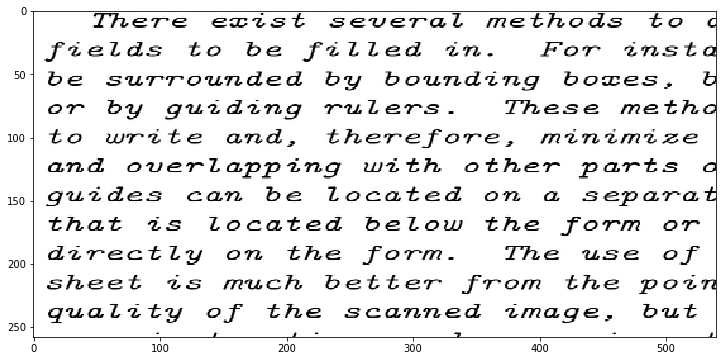

In [77]:
plt.figure(figsize=(18,6))
plt.imshow(y_train_img[20].reshape(258,540),cmap='gray')

####                                      Document without Noise - Target Image (y_train)

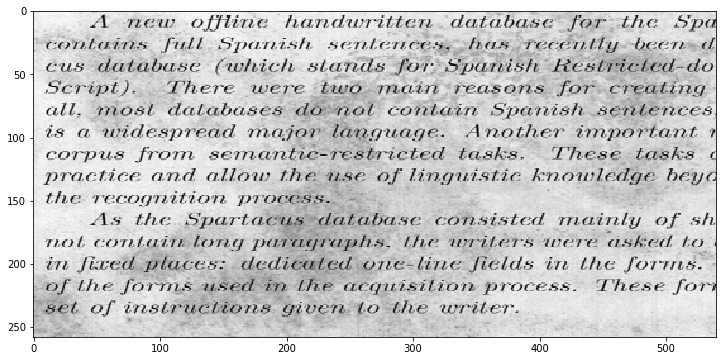

In [78]:
plt.figure(figsize=(18,6))
plt.imshow(X_test_img[20].reshape(258,540),cmap='gray',)

                Document without Noise - Test Image (X_test)

### 2. Splitting the data into train,test

In [6]:
X_train,y_train = X_train_img,y_train_img
X_test = X_test_img


In [80]:
print("Train Images",X_train.shape[0])
print("Test Images",X_test.shape[0])

Train Images 144
Test Images 72


In [81]:
X_test.shape

(72, 258, 540, 1)

### 3. Autoencoder Model

In [82]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense
from keras.models import Model
from keras.activations import relu,sigmoid
from keras.losses import MSE
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [83]:
X_train.shape

(144, 258, 540, 1)

In [84]:

input_layer = Input(shape=(258, 540, 1))
        
#Encoder
x = Dense(32)(input_layer)
x = Conv2D(64, 3, activation=relu, padding='same')(input_layer)
x = MaxPooling2D(2, padding='same')(x)
#x = Conv2D(64, 3 , activation=relu, padding='same')(x)
#x = MaxPooling2D(2, padding='same')(x)
        
#Decoder
x = Conv2D(64, 3, activation=relu, padding='same')(x)
x = UpSampling2D(2)(x)
x = Dense(32)(x)
#x = Conv2D(32, 3, activation=relu, padding='same')(x)
#x = UpSampling2D(2,(x))

output_layer = Conv2D(1, 3, activation=sigmoid, padding='same')(x)
autoencoder = Model(input_layer, output_layer)

autoencoder.compile(loss=MSE, optimizer=Adam())

In [85]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 258, 540, 1)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 258, 540, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 129, 270, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 129, 270, 64)      36928     
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 258, 540, 64)      0         
_________________________________________________________________
dense_6 (Dense)              (None, 258, 540, 32)      2080      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 258, 540, 1)       289       
Total para

In [86]:
from keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath='autoencoder.hdf5',save_best_only=True,verbose=1)

callbacks = [checkpointer]

In [87]:
history = autoencoder.fit(X_train, y_train,
                          batch_size=12,
                          epochs=200,
                          validation_split=0.15,
                          callbacks=callbacks,
                          verbose=1)

Train on 122 samples, validate on 22 samples
Epoch 1/200
122/122 [==============================] - 3s 23ms/step - loss: 0.1439 - val_loss: 0.0615

Epoch 00001: val_loss improved from inf to 0.06147, saving model to autoencoder.hdf5
Epoch 2/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0772 - val_loss: 0.0665

Epoch 00002: val_loss did not improve from 0.06147
Epoch 3/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0720 - val_loss: 0.0596

Epoch 00003: val_loss improved from 0.06147 to 0.05963, saving model to autoencoder.hdf5
Epoch 4/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0589 - val_loss: 0.0433

Epoch 00004: val_loss improved from 0.05963 to 0.04334, saving model to autoencoder.hdf5
Epoch 5/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0434 - val_loss: 0.0283

Epoch 00005: val_loss improved from 0.04334 to 0.02835, saving model to autoencoder.hdf5
Epoch 6/200
122/122 [================

122/122 [==============================] - 2s 19ms/step - loss: 0.0045 - val_loss: 0.0039

Epoch 00045: val_loss improved from 0.00394 to 0.00386, saving model to autoencoder.hdf5
Epoch 46/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0045 - val_loss: 0.0038

Epoch 00046: val_loss improved from 0.00386 to 0.00383, saving model to autoencoder.hdf5
Epoch 47/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0044 - val_loss: 0.0037

Epoch 00047: val_loss improved from 0.00383 to 0.00375, saving model to autoencoder.hdf5
Epoch 48/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0043 - val_loss: 0.0037

Epoch 00048: val_loss improved from 0.00375 to 0.00373, saving model to autoencoder.hdf5
Epoch 49/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0042 - val_loss: 0.0037

Epoch 00049: val_loss did not improve from 0.00373
Epoch 50/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0042 - 

122/122 [==============================] - 2s 20ms/step - loss: 0.0028 - val_loss: 0.0026

Epoch 00091: val_loss did not improve from 0.00245
Epoch 92/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0028 - val_loss: 0.0025

Epoch 00092: val_loss did not improve from 0.00245
Epoch 93/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0028 - val_loss: 0.0024

Epoch 00093: val_loss improved from 0.00245 to 0.00240, saving model to autoencoder.hdf5
Epoch 94/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0027 - val_loss: 0.0024

Epoch 00094: val_loss improved from 0.00240 to 0.00239, saving model to autoencoder.hdf5
Epoch 95/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0027 - val_loss: 0.0025

Epoch 00095: val_loss did not improve from 0.00239
Epoch 96/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0028 - val_loss: 0.0026

Epoch 00096: val_loss did not improve from 0.00239
Epoch 9

122/122 [==============================] - 2s 19ms/step - loss: 0.0021 - val_loss: 0.0020

Epoch 00138: val_loss did not improve from 0.00193
Epoch 139/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0021 - val_loss: 0.0020

Epoch 00139: val_loss did not improve from 0.00193
Epoch 140/200
122/122 [==============================] - 2s 20ms/step - loss: 0.0021 - val_loss: 0.0020

Epoch 00140: val_loss did not improve from 0.00193
Epoch 141/200
122/122 [==============================] - 2s 20ms/step - loss: 0.0021 - val_loss: 0.0019

Epoch 00141: val_loss improved from 0.00193 to 0.00189, saving model to autoencoder.hdf5
Epoch 142/200
122/122 [==============================] - 2s 20ms/step - loss: 0.0021 - val_loss: 0.0019

Epoch 00142: val_loss did not improve from 0.00189
Epoch 143/200
122/122 [==============================] - 2s 19ms/step - loss: 0.0021 - val_loss: 0.0019

Epoch 00143: val_loss did not improve from 0.00189
Epoch 144/200
122/122 [=================

In [88]:
gc.collect()

337